In [7]:
#Import packages
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#Extract dataset
data = load_iris()
X = data.data
y = data.target

In [9]:
#Create train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [11]:
#Standardized the data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
weights,params = [],[]
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10**int(c),random_state=21)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**int(c))

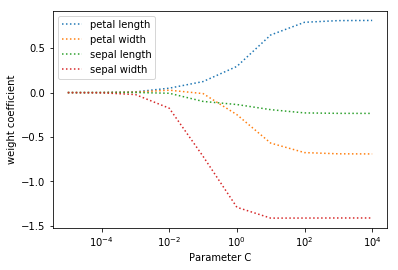

In [46]:
#plot the coefficients of features with respect to Inverse regularization
plt.plot(np.array(params),np.array(weights)[:,2],linestyle='dotted',label='petal length')
plt.plot(np.array(params),np.array(weights)[:,3],linestyle='dotted',label='petal width')
plt.plot(np.array(params),np.array(weights)[:,0],linestyle='dotted',label='sepal length')
plt.plot(np.array(params),np.array(weights)[:,1],linestyle='dotted',label='sepal width')
plt.xlabel('Parameter C')
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.legend()
plt.show()

## As per the above plot we see coefficients shrink as we decrease the C value